In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pweb

In [6]:
from datetime import datetime

In [7]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [12]:
for stock in tech_list:
    globals()[stock] = pweb.DataReader(stock, 'iex', start, end)

In [13]:
type(AAPL)

pandas.core.frame.DataFrame

In [14]:
AAPL.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,188.014740,189.824440,186.300813,188.061512,3.243511e+07
std,20.352606,20.556958,20.075999,20.358854,1.375511e+07
min,152.539900,156.188900,148.621300,152.855100,1.251979e+07
25%,171.533775,172.817900,170.395825,171.581425,2.288831e+07
50%,184.799800,185.936850,183.319450,184.705450,2.927616e+07
75%,206.016150,208.111425,204.867025,206.771050,3.841237e+07
max,229.977600,232.658200,228.981100,231.263100,9.624675e+07


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-11-30 to 2018-11-29
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


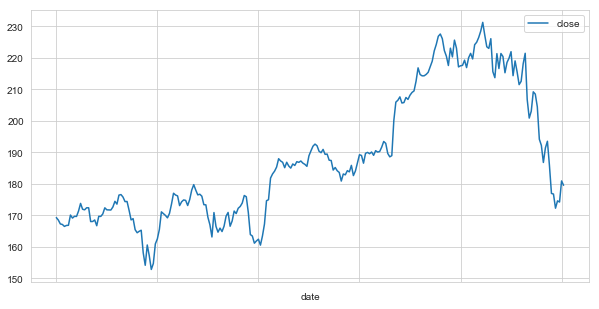

In [16]:
AAPL['close'].plot(legend = True, figsize = (10,5))

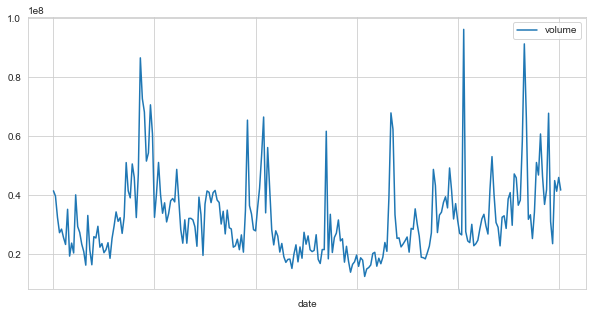

In [17]:
AAPL['volume'].plot(legend = True, figsize = (10,5))

In [18]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['close'].rolling(ma).mean()

In [19]:
AAPL.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50
date,,,,,,,,
2017-11-30,167.9091,169.5938,165.9485,169.3081,41527218,NaN,NaN,NaN
2017-12-01,167.4362,169.1308,166.0077,168.5199,39759288,NaN,NaN,NaN
2017-12-04,169.9288,170.0667,167.1209,167.2884,32542385,NaN,NaN,NaN
2017-12-05,166.5594,168.9830,165.9091,167.1308,27350154,NaN,NaN,NaN
2017-12-06,165.0224,167.6871,163.9978,166.5101,28560000,NaN,NaN,NaN


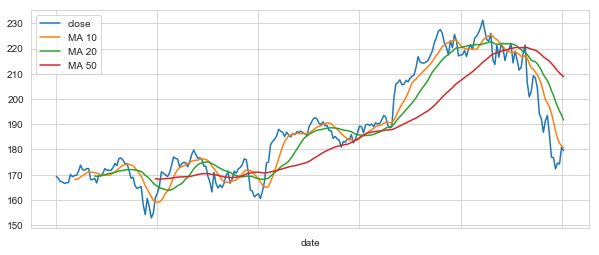

In [20]:
AAPL[['close', 'MA 10','MA 20','MA 50']].plot(subplots = False, figsize = (10,4))

In [21]:
AAPL['Daily Return'] = AAPL['close'].pct_change()

In [22]:
AAPL.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50,Daily Return
date,,,,,,,,,
2017-11-30,167.9091,169.5938,165.9485,169.3081,41527218,NaN,NaN,NaN,NaN
2017-12-01,167.4362,169.1308,166.0077,168.5199,39759288,NaN,NaN,NaN,-0.004655
2017-12-04,169.9288,170.0667,167.1209,167.2884,32542385,NaN,NaN,NaN,-0.007308
2017-12-05,166.5594,168.9830,165.9091,167.1308,27350154,NaN,NaN,NaN,-0.000942
2017-12-06,165.0224,167.6871,163.9978,166.5101,28560000,NaN,NaN,NaN,-0.003714


In [23]:
AAPL['Daily Return'] = AAPL['Daily Return'] * 100

In [24]:
AAPL.head()

,open,high,low,close,volume,MA 10,MA 20,MA 50,Daily Return
date,,,,,,,,,
2017-11-30,167.9091,169.5938,165.9485,169.3081,41527218,NaN,NaN,NaN,NaN
2017-12-01,167.4362,169.1308,166.0077,168.5199,39759288,NaN,NaN,NaN,-0.465542
2017-12-04,169.9288,170.0667,167.1209,167.2884,32542385,NaN,NaN,NaN,-0.730774
2017-12-05,166.5594,168.9830,165.9091,167.1308,27350154,NaN,NaN,NaN,-0.094209
2017-12-06,165.0224,167.6871,163.9978,166.5101,28560000,NaN,NaN,NaN,-0.371386


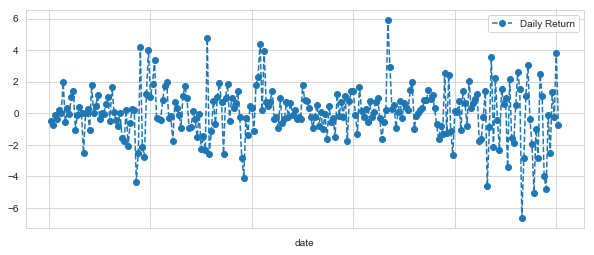

In [25]:
AAPL['Daily Return'].plot(legend = True, figsize = (10,4),linestyle = '--',marker = 'o')

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


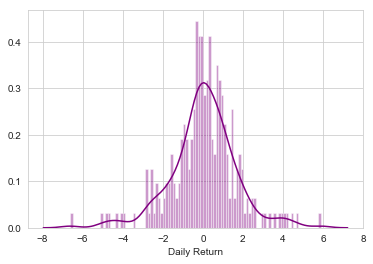

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

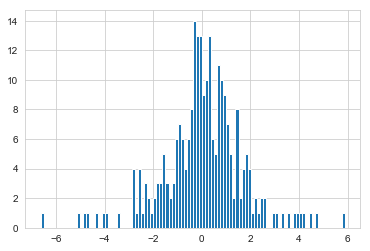

In [27]:
AAPL['Daily Return'].hist(bins = 100)

In [28]:
closing_df = DataFrame([])
for stock in tech_list:
    df = pweb.DataReader(stock,'iex', start, end)
    closing_df[stock] = df['close']

In [29]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
date,,,,
2017-11-30,169.3081,1021.41,82.7377,1176.75
2017-12-01,168.5199,1010.17,82.8262,1162.35
2017-12-04,167.2884,998.68,79.7003,1133.95
2017-12-05,167.1308,1005.15,80.2016,1141.57
2017-12-06,166.5101,1018.38,81.3714,1152.35


In [30]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
date,,,,
2017-11-30,NaN,NaN,NaN,NaN
2017-12-01,-0.004655,-0.011004,0.001070,-0.012237
2017-12-04,-0.007308,-0.011374,-0.037740,-0.024433
2017-12-05,-0.000942,0.006479,0.006290,0.006720
2017-12-06,-0.003714,0.013162,0.014586,0.009443


/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


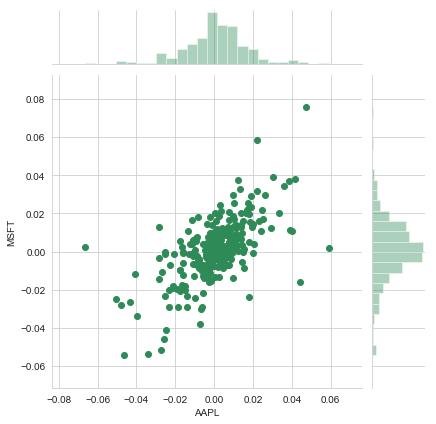

In [32]:
sns.jointplot('AAPL','MSFT',tech_rets, kind= 'scatter', color = 'seagreen')

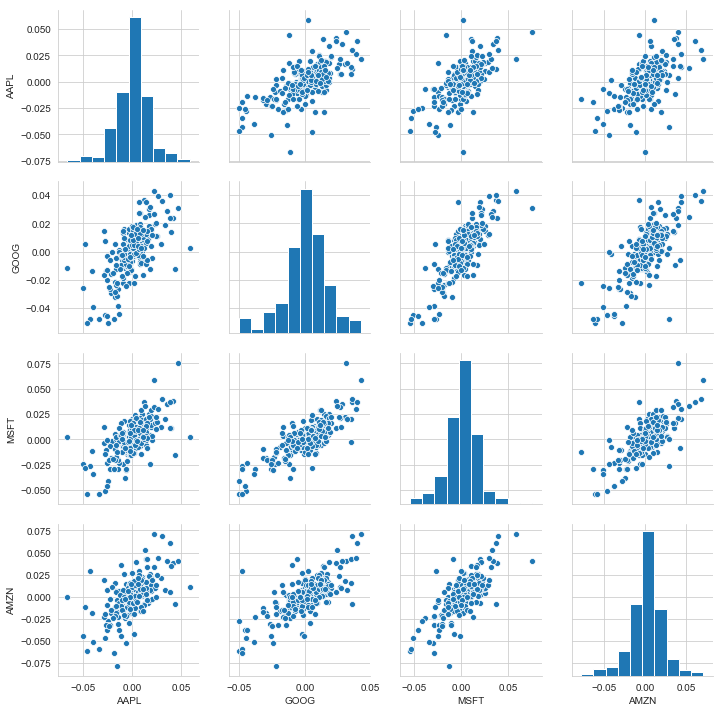

In [33]:
sns.pairplot(tech_rets.dropna())

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


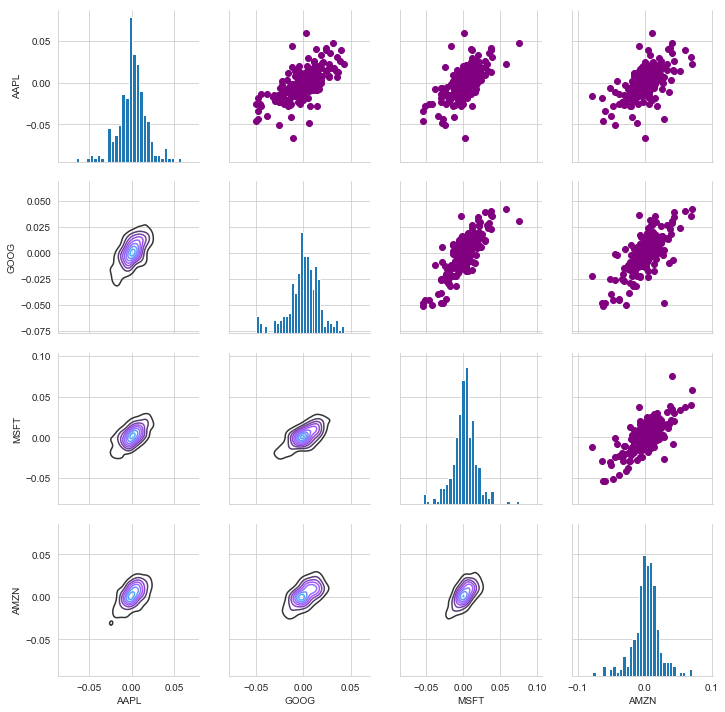

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


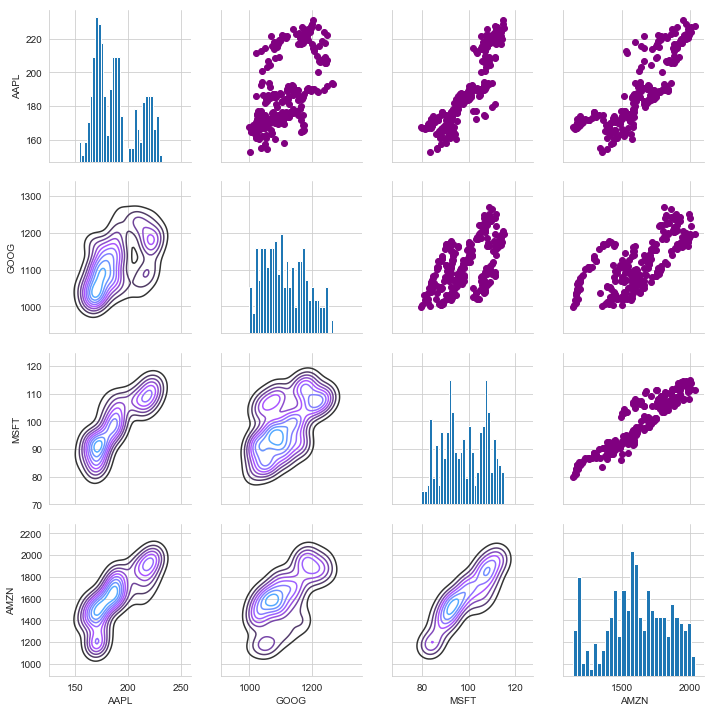

In [35]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

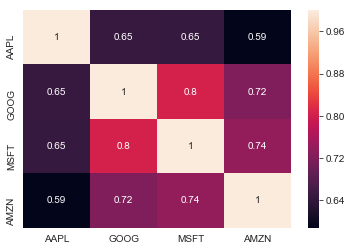

In [36]:
sns.heatmap(tech_rets.corr(), annot = True)

In [37]:
rets = tech_rets.dropna()

In [38]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
date,,,,
2017-12-01,-0.004655,-0.011004,0.001070,-0.012237
2017-12-04,-0.007308,-0.011374,-0.037740,-0.024433
2017-12-05,-0.000942,0.006479,0.006290,0.006720
2017-12-06,-0.003714,0.013162,0.014586,0.009443
2017-12-07,0.001834,0.012323,-0.003504,0.006456


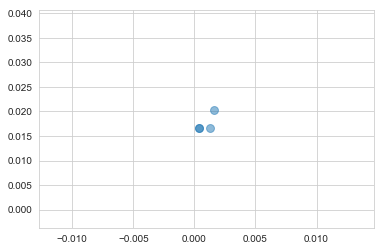

In [39]:
plt.scatter(rets.mean(), rets.std(),alpha = 0.5, s = np.pi * 20)

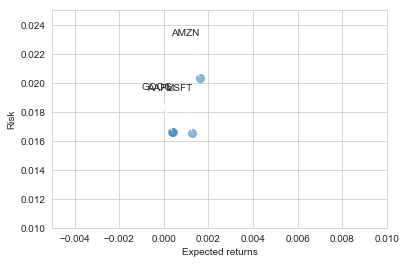

In [40]:
plt.scatter(rets.mean(), rets.std(),alpha = 0.5, s = np.pi * 20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(label, xy = (x,y), xytext = (0,40),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3'))

/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


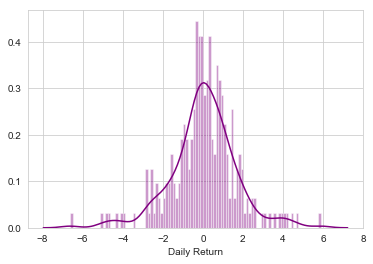

In [41]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [42]:
rets['AAPL'].quantile(0.05)

-0.026133727980218235

In [43]:
days = 365
dt = 1 / days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [44]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [45]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2017-11-30,1022.37,1028.49,1015.00,1021.41,1724031
2017-12-01,1015.80,1022.49,1002.02,1010.17,1909566
2017-12-04,1012.66,1016.10,995.57,998.68,1906439
2017-12-05,995.94,1020.61,988.28,1005.15,2067318
2017-12-06,1001.50,1024.97,1001.14,1018.38,1271964


Text(0.5,1,'Monte Carlo Analysis')

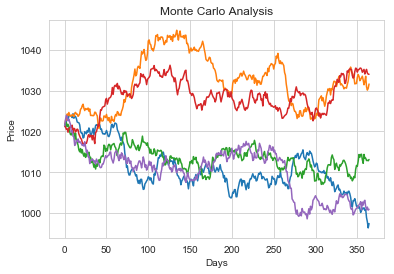

In [46]:
start_price = GOOG.iloc[0,3]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [47]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days -1]

(array([2., 2., 0., ..., 0., 0., 1.]),
 array([ 963.66252768,  964.31945891,  964.97639014, ..., 1093.73491106,
        1094.39184229, 1095.04877352]),
 <a list of 200 Patch objects>)

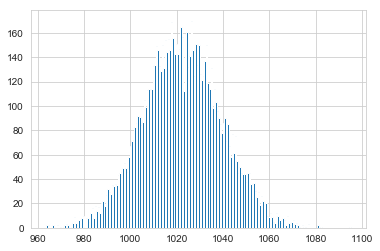

In [48]:
plt.hist(simulations, bins = 200)

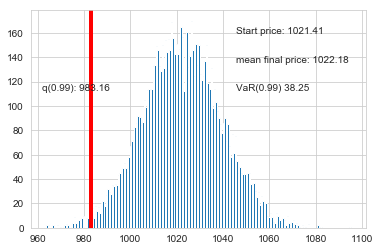

In [50]:
q = np.percentile(simulations , 1)
plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s = 'Start price: {:.2f}'.format(start_price))
plt.figtext(0.6,0.7,'mean final price: {:.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99) {:.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth = 4, color = 'r')

In [2]:
'{:.2f}'.format(123.456)

'123.46'

In [79]:
'{:.2}'.format(1234.566)

'1.2e+03'